# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [94]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

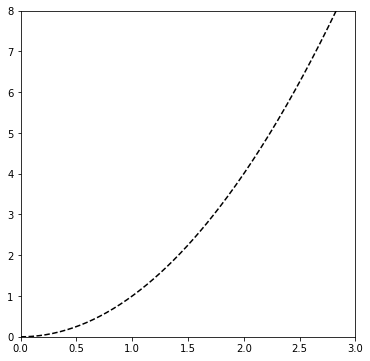

In [95]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

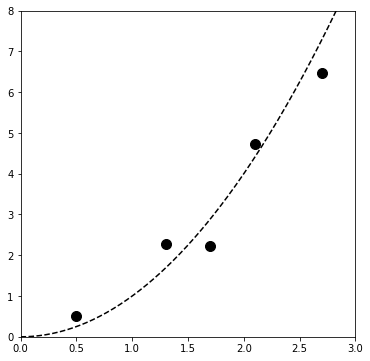

In [96]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [97]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[2.92778833]
-1.8621436154865594


Definiujemy naszą funkcję regresji

In [98]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

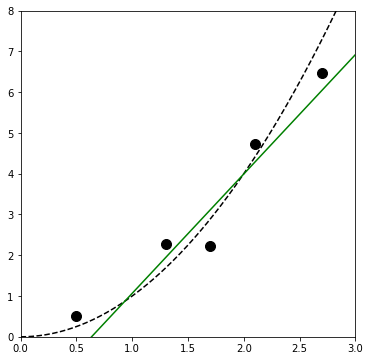

In [99]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [100]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

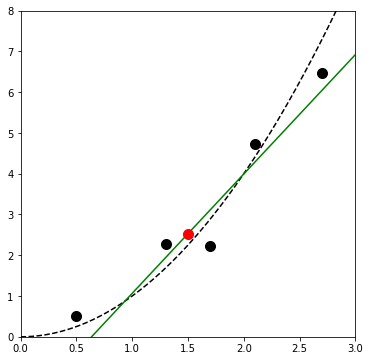

In [101]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [102]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.9102187667895725
0.9013630167974953


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [103]:
deg=1
xx=np.vander(x, deg + 1)
xx

array([[0.2, 1. ],
       [0.5, 1. ],
       [0.8, 1. ],
       [0.9, 1. ],
       [1.3, 1. ],
       [1.7, 1. ],
       [2.1, 1. ],
       [2.7, 1. ]])

In [104]:
np.linalg.solve(xx.T @ xx, xx.T @ y)

array([ 2.92778833, -1.86214362])

# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [105]:
from scipy import optimize
def f(pair):
    x,y = pair
    return (x+1)**2 + y**2
optimize.fmin_cg(f, x0=[(100,100)])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 36
         Gradient evaluations: 9


array([-9.99999996e-01,  3.67567063e-09])

# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [106]:
import numpy as np
def compute_error(ab, xy):
    a, b = ab
    x, y = xy
    return sum([(yi - (a*xi + b))**2 for xi, yi in zip(x, y)])

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [107]:
from functools import partial
fun = partial(compute_error, xy=(x,y))
optimize.fmin_cg(fun, x0=(0, 1))

Optimization terminated successfully.
         Current function value: 4.240236
         Iterations: 7
         Function evaluations: 56
         Gradient evaluations: 14


array([ 2.92778833, -1.86214361])

# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [108]:
def compute_error_1(ab, xy):
    a, b = ab
    x, y = xy
    return sum([np.abs(yi - (a*xi + b)) for xi, yi in zip(x, y)])

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [109]:
fun = partial(compute_error_1, xy=(x,y))
optimize.fmin_cg(fun, x0=(0, 1))

         Current function value: 4.848283
         Iterations: 2
         Function evaluations: 262
         Gradient evaluations: 64


array([ 2.91080808, -1.50962441])

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


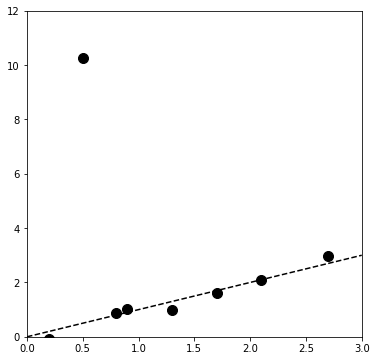

In [110]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [111]:
points = np.column_stack((x,y))
print(points)
fun = partial(compute_error, xy=(x,y))
fun1 = partial(compute_error_1, xy=(x,y))
for (x,y) in [(0.2, 0.1751458), (0.5, 10.94554555), (0.8, 0.97242032), (0.9, 0.75789737), (1.3, 1.56536345), (1.7, 1.77111648), (2.1, 2.14434363), (2.7, 2.83385066)]:
  res0 = optimize.fmin_cg(fun, x0=(x, y))
  res1 = optimize.fmin_cg(fun1, x0=(x, y))
  print(res0, res1)
  print(fun(res0), fun1(res1))

[[ 0.2        -0.07770386]
 [ 0.5        10.26829306]
 [ 0.8         0.88917067]
 [ 0.9         1.02019191]
 [ 1.3         0.97135536]
 [ 1.7         1.61587127]
 [ 2.1         2.08973972]
 [ 2.7         2.95495184]]
Optimization terminated successfully.
         Current function value: 74.435771
         Iterations: 5
         Function evaluations: 40
         Gradient evaluations: 10
         Current function value: 11.005045
         Iterations: 3
         Function evaluations: 79
         Gradient evaluations: 19
[-0.40547421  2.98346335] [0.95265665 0.04384186]
74.43577100482182 11.005045430929917
Optimization terminated successfully.
         Current function value: 74.435771
         Iterations: 3
         Function evaluations: 28
         Gradient evaluations: 7
         Current function value: 10.983225
         Iterations: 8
         Function evaluations: 552
         Gradient evaluations: 135
[-0.40547392  2.98346296] [ 1.1247003 -0.2721309]
74.43577100482197 10.983225096206